In [1]:
!gdown 1bovNNpZgwF-LwpGl-P388WOu921aesKp

Downloading...
From: https://drive.google.com/uc?id=1bovNNpZgwF-LwpGl-P388WOu921aesKp
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 66.1MB/s]


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('Ecom_CRM_analysis.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
## **Cleansing Dataset**


In [ ]:
#Investigate missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#drop missing value
df = df.dropna()
df.shape

(406829, 8)

In [ ]:
#Check the data type
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#Cleaning String and data type
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace(r"\s+",' ', regex = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['CustomerID'] = df['CustomerID'].astype('string')
df.dtypes

InvoiceNo      string[python]
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country                object
dtype: object

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


In [ ]:
#Remove duplicate data in EXACT columns
df.drop_duplicates(inplace = True)
df.shape

(401604, 8)

In [ ]:
#Filtering transaction with invoice number started with letter 'C'
df = df[~df.InvoiceNo.str.contains('C')]
df.shape

(392732, 8)

In [ ]:
#Finding the IQR of UnitPrice
percentile25 = df['UnitPrice'].quantile(0.25)
percentile75 = df['UnitPrice'].quantile(0.75)
iqr = percentile75 - percentile25
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Removing Outlier from UnitPrice
new_df = df[(df['UnitPrice'] < upper_limit)  & (df['UnitPrice'] > lower_limit)]
print(df.shape)
print(new_df.shape)

(392732, 8)
(358036, 8)


In [ ]:
#Finding the IQR of Quantity
percentile25 = new_df['Quantity'].quantile(0.25)
percentile75 = new_df['Quantity'].quantile(0.75)
iqr = percentile75 - percentile25
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Removing Outlier from Quantity
new_df = new_df[(new_df['Quantity'] < upper_limit)  & (new_df['Quantity'] > lower_limit)]
print(new_df.shape)

(332645, 8)


In [ ]:
#Extract date from datetime column in Pandas
new_df['Date'] = new_df['InvoiceDate'].dt.normalize()
new_df['Year'] = new_df['InvoiceDate'].dt.year
new_df['Month'] = new_df['InvoiceDate'].dt.month_name().str[:3]
new_df['Day'] = new_df['InvoiceDate'].dt.day_name()
new_df['hour'] = new_df['InvoiceDate'].dt.hour
new_df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

In [ ]:
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']

In [ ]:
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,hour,month_year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34


In [ ]:
##Exploratory Analysis

In [ ]:
Sales_Country = new_df.groupby(['Country']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)
print(Sales_Country.head(10))

                Total_Order        Sales  Quantity
Country                                           
United Kingdom       299750  3669450.234   2153681
Germany                7439   137698.830     83838
France                 6882   121821.440     75333
EIRE                   5423   105427.120     58706
Spain                  2039    29796.960     18415
Switzerland            1433    29670.460     17972
Belgium                1657    27794.110     17747
Portugal               1252    20408.770     12039
Norway                  768    17980.760      9375
Netherlands             609    14723.900      7094


In [ ]:
Foreign_Sales = Sales_Country.reset_index().query('Country != "United Kingdom"')
Foreign_Sales.head(10)

,Country,Total_Order,Sales,Quantity
1,Germany,7439,137698.83,83838
2,France,6882,121821.44,75333
3,EIRE,5423,105427.12,58706
4,Spain,2039,29796.96,18415
5,Switzerland,1433,29670.46,17972
6,Belgium,1657,27794.11,17747
7,Portugal,1252,20408.77,12039
8,Norway,768,17980.76,9375
9,Netherlands,609,14723.90,7094
10,Australia,511,12712.24,5225


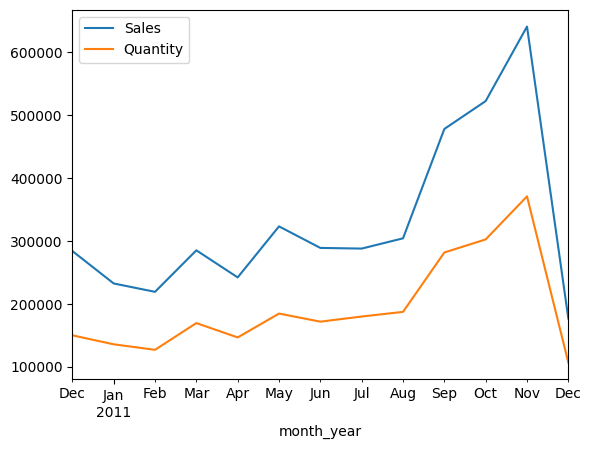

In [ ]:
#Month on Month sales

Sales_MoM = pd.DataFrame(new_df.groupby(['month_year']).agg({'Sales':'sum', 'Quantity':'sum'})).reset_index()
Sales_MoM.plot(x='month_year');

In [ ]:
#Total sales and quantity by product description

Sales_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)[0:10]
Quantity_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Quantity', ascending=False)[0:10]
print(Sales_Product)
print(Quantity_Product)

                                    Total_Order     Sales
Description                                              
PARTY BUNTING                              1268  34952.85
WHITE HANGING HEART T-LIGHT HOLDER         1668  31763.76
JUMBO BAG RED RETROSPOT                    1327  24923.50
SPOTTY BUNTING                              972  23379.40
ASSORTED COLOUR BIRD ORNAMENT              1144  22848.80
JAM MAKING SET WITH JARS                    824  21137.25
HOT WATER BOTTLE KEEP CALM                  723  20617.35
SET OF 3 CAKE TINS PANTRY DESIGN           1113  20583.97
CHILLI LIGHTS                               443  18379.80
CHOCOLATE HOT WATER BOTTLE                  684  18308.10
                                    Total_Order  Quantity
Description                                              
PACK OF 72 RETROSPOT CAKE CASES             945     14986
ASSORTED COLOUR BIRD ORNAMENT              1144     13520
JUMBO BAG RED RETROSPOT                    1327     12167
WHITE HANGING 

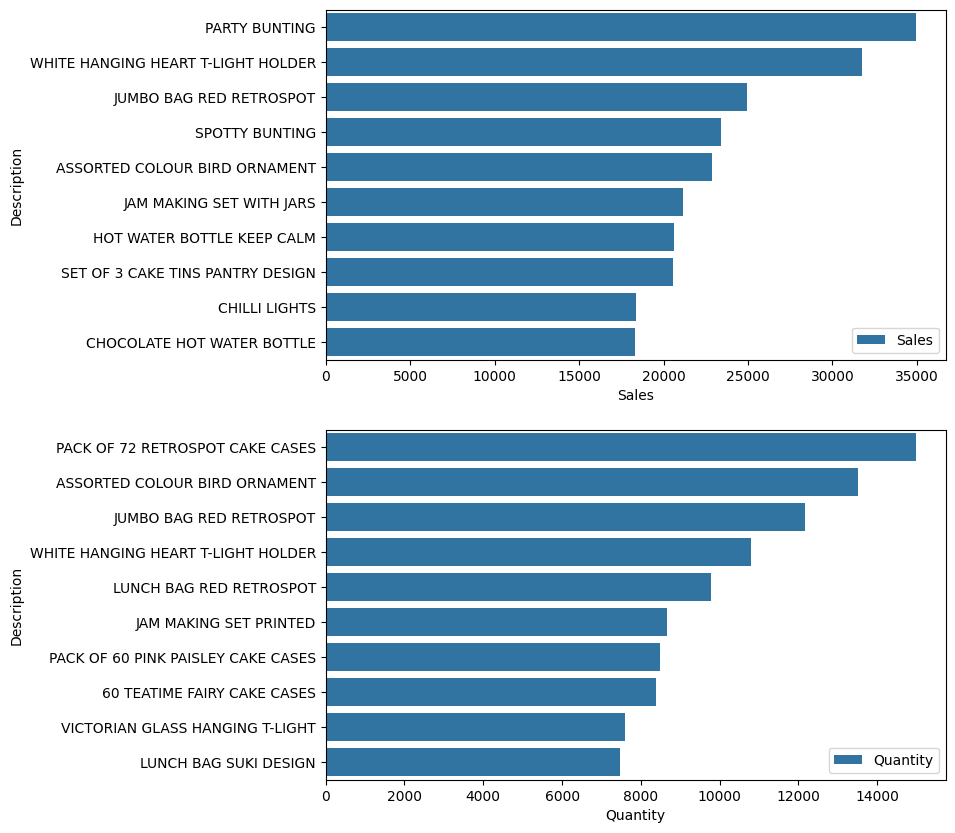

In [ ]:
fig, axes = plt.subplots(2,figsize=(8, 10))
sns.barplot(x='Sales', y=Sales_Product.index, data = Sales_Product,
            label="Sales", ax=axes[0])
sns.barplot(x='Quantity', y=Quantity_Product.index, data=Quantity_Product,
            label="Quantity", ax=axes[1])
plt.show()

In [ ]:
##tt means the higher quantity of sales does not guarantee te higher sales earned.

In [ ]:
Quantity_Sales = Quantity_Product.merge(Sales_Product, left_index=True, right_index=True, how='inner')
Quantity_Sales

,Total_Order_x,Quantity,Total_Order_y,Sales
Description,,,,
ASSORTED COLOUR BIRD ORNAMENT,1144,13520,1144,22848.80
JUMBO BAG RED RETROSPOT,1327,12167,1327,24923.50
WHITE HANGING HEART T-LIGHT HOLDER,1668,10784,1668,31763.76


In [ ]:
##There is only 3 products that have the highest quantity and sales out of total 3858 products

In [ ]:
unique_description_count = df['Description'].nunique()
print("Unique count of Description:", unique_description_count)

Unique count of Description: 3858


In [ ]:
##Highest and Lowest Month of Sales

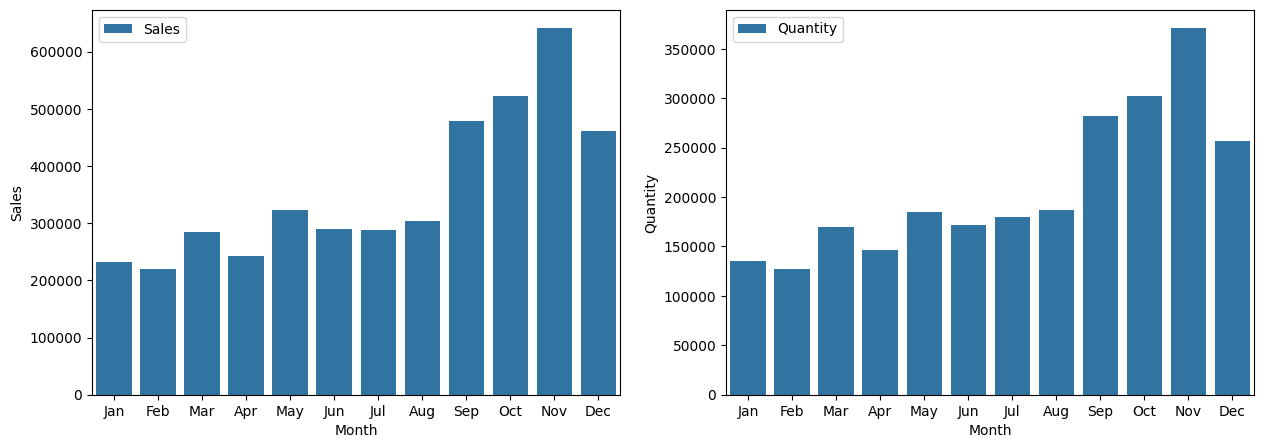

In [ ]:
Monthly_Sales = new_df.groupby(['Month']).agg({'Sales':'sum', 'Quantity':'sum'})
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_Sales = Monthly_Sales.reindex(months_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Monthly_Sales.index, y='Sales', data = Monthly_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Monthly_Sales.index, y='Quantity', data = Monthly_Sales,
            label="Quantity", ax=axes[1])
plt.show()

In [ ]:
##Highest Sales of Day

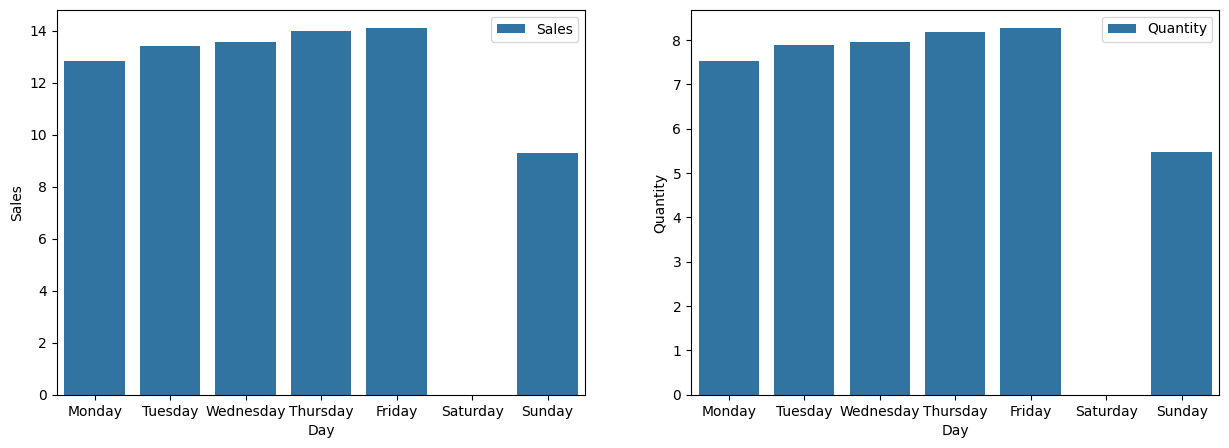

In [ ]:
Day_Sales = new_df.groupby(['Day']).agg({'Sales':'mean', 'Quantity':'mean'})
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Day_Sales = Day_Sales.reindex(day_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Day_Sales.index, y='Sales', data = Day_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Day_Sales.index, y='Quantity', data = Day_Sales,
            label="Quantity", ax=axes[1])
plt.show()

In [ ]:
##Saturday is a holiday and no transactions Frida seems to be the peak day for sales

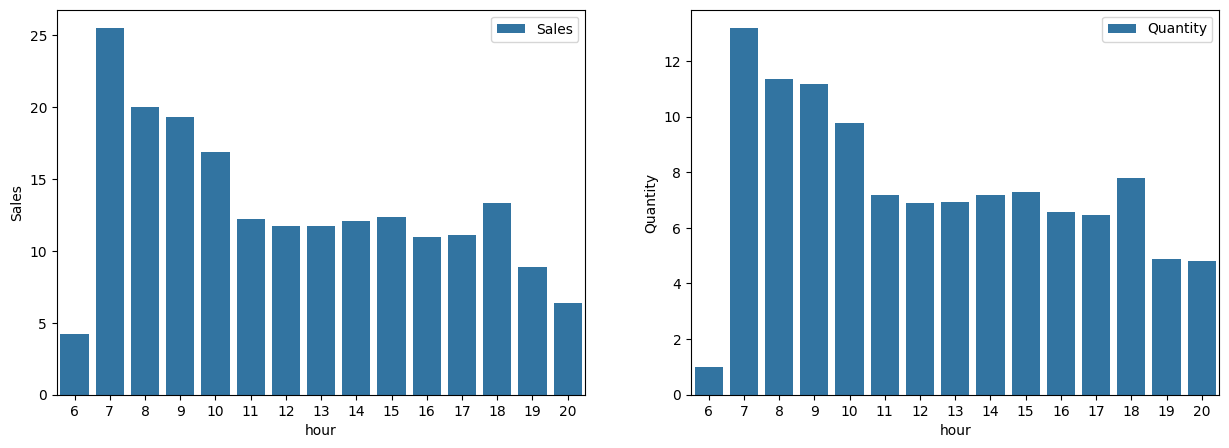

In [ ]:
Hour_Sales = new_df.groupby(['hour']).agg({'Sales':'mean', 'Quantity':'mean'})
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Hour_Sales.index, y='Sales', data = Hour_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Hour_Sales.index, y='Quantity', data = Hour_Sales,
            label="Quantity", ax=axes[1])
plt.show()

In [ ]:
##Most of thetranactions are happening during the morning hours between 7-10 AM

In [ ]:
##Customer - Customer Demography

In [ ]:
Customer_Demog = new_df.groupby('Country').agg({'CustomerID': ['nunique'],
                                      'CustomerID': 'count'})
print(Customer_Demog.sort_values('CustomerID', ascending=False)[0:10])

                CustomerID
Country                   
United Kingdom      299750
Germany               7439
France                6882
EIRE                  5423
Spain                 2039
Belgium               1657
Switzerland           1433
Portugal              1252
Norway                 768
Netherlands            609


In [ ]:
#Most of the customers are from UK

In [ ]:
Foreign_Demog = Customer_Demog.reset_index().query('Country != "United Kingdom"')
Foreign_Demog.sort_values('CustomerID', ascending=False).head(10)

,Country,CustomerID
14,Germany,7439
13,France,6882
10,EIRE,5423
30,Spain,2039
3,Belgium,1657
32,Switzerland,1433
26,Portugal,1252
24,Norway,768
23,Netherlands,609
18,Italy,603


In [ ]:
##Lets look at the top customers who give the highest sales and buy highest quantity

In [ ]:
Sales_Customer = new_df.groupby(['CustomerID']).agg({'Sales':'sum'}).sort_values('Sales', ascending=False)[0:10]
Quantity_Customer = new_df.groupby(['CustomerID']).agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False)[0:10]
print(Sales_Customer)

               Sales
CustomerID          
14911.0     84635.89
14096.0     36019.84
13089.0     35987.88
17841.0     32179.59
14298.0     24322.40
12748.0     20345.55
14156.0     18178.61
13081.0     17925.53
15311.0     17712.96
14088.0     14870.91


In [ ]:
print(Quantity_Customer)

            Quantity
CustomerID          
14911.0        49350
13089.0        20240
17841.0        19513
14298.0        17448
12748.0        14957
14096.0        13509
13081.0        12045
15159.0         8194
15311.0         8058
14156.0         7858


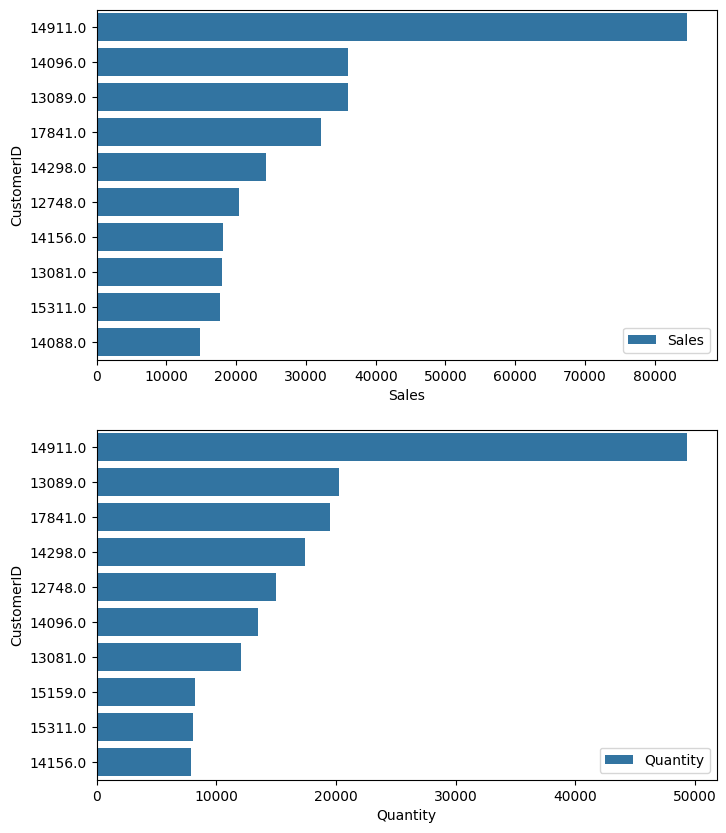

In [ ]:
fig, axes = plt.subplots(2,figsize=(8, 10))
sns.barplot(x='Sales', y=Sales_Customer.index, data = Sales_Customer,
            label="Sales", ax=axes[0])
sns.barplot(x='Quantity', y=Quantity_Customer.index, data=Quantity_Customer,
            label="Quantity", ax=axes[1])
plt.show()

In [ ]:
#Top customers generating highest sales and buying highest quantity

In [ ]:
Quantity_Sales_Cust = Quantity_Customer.merge(Sales_Customer, left_index=True, right_index=True, how='inner')
Quantity_Sales_Cust


,Quantity,Sales
CustomerID,,
14911.0,49350,84635.89
13089.0,20240,35987.88
17841.0,19513,32179.59
14298.0,17448,24322.40
12748.0,14957,20345.55
14096.0,13509,36019.84
13081.0,12045,17925.53
15311.0,8058,17712.96
14156.0,7858,18178.61


In [ ]:
##Order vs Sales

In [ ]:
Customer_Order = new_df.groupby('CustomerID').agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Total_Order', ascending=False)[0:10]
Customer_Order

,Total_Order,Sales
CustomerID,,
17841.0,7204,32179.59
14911.0,4472,84635.89
14096.0,4415,36019.84
12748.0,4041,20345.55
14606.0,2421,8145.76
15311.0,1912,17712.96
13263.0,1614,6705.86
13089.0,1497,35987.88
15039.0,1261,13956.62


In [ ]:
##ARPU (Average Revenue Per User) of Customer So, huw much we got per transaction?

In [ ]:
customer_arpu = new_df.groupby('CustomerID').agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'})
customer_arpu['arpu'] = customer_arpu.Sales / customer_arpu.Total_Order
print(customer_arpu.describe())

       Total_Order         Sales         arpu
count  4191.000000   4191.000000  4191.000000
mean     79.371272   1022.596505    16.779083
std     200.160146   2190.201893    11.594150
min       1.000000      0.000000     0.000000
25%      14.000000    205.980000     9.629767
50%      35.000000    465.470000    16.055714
75%      87.000000   1126.400000    19.558401
max    7204.000000  84635.890000   166.800000


In [ ]:
print(customer_arpu.sort_values('arpu', ascending=False)[0:10])

            Total_Order  Sales    arpu
CustomerID                            
16716.0               1  166.8  166.80
16319.0               3  404.4  134.80
14434.0               8  964.8  120.60
13147.0               2  237.6  118.80
15269.0               1  118.8  118.80
13261.0               6  670.5  111.75
13763.0               3  308.4  102.80
15619.0               1   99.6   99.60
13188.0               1   99.6   99.60
12882.0              10  995.4   99.54


In [ ]:
##APRU for the top customers
Top_Arpu = customer_arpu.sort_values('Sales', ascending=False)[0:10]
Top_Arpu

,Total_Order,Sales,arpu
CustomerID,,,
14911.0,4472,84635.89,18.925736
14096.0,4415,36019.84,8.158514
13089.0,1497,35987.88,24.040000
17841.0,7204,32179.59,4.466906
14298.0,1009,24322.40,24.105451
12748.0,4041,20345.55,5.034781
14156.0,820,18178.61,22.169037
13081.0,849,17925.53,21.113698
15311.0,1912,17712.96,9.264100


In [ ]:
Top_Arpu.describe()

,Total_Order,Sales,arpu
count,10.000000,10.000000,10.000000
mean,2650.500000,30217.916000,18.927441
std,2257.250897,20688.944298,14.036630
min,286.000000,14870.910000,4.466906
25%,889.000000,17988.800000,8.434911
50%,1704.500000,22333.975000,20.019717
75%,4321.500000,35035.807500,23.572259
max,7204.000000,84635.890000,51.996189


In [ ]:
##Customer Segmentation using RFM Analysis

In [ ]:
# import libraries
import datetime as dt

df_UK = new_df[new_df['Country'] == "United Kingdom"]
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,hour,month_year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34


In [ ]:
temp=['CustomerID', 'Quantity', 'InvoiceDate', 'Sales']
RFM_data=df_UK[temp]
RFM_data.shape

(299750, 4)

In [ ]:
print(df_UK['InvoiceDate'].min())
print(df_UK['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [ ]:
NOW = dt.datetime(2011,12,10)
#Convert ORDERDATE to datetime format.
RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])
# RFM Table
RFM_table=RFM_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                                'Quantity': lambda x: len(x.unique()),
                                                'Sales': lambda x: x.sum()})

RFM_table['InvoiceDate'] = RFM_table['InvoiceDate'].astype(int)

RFM_table.rename(columns={'InvoiceDate': 'recency',
                         'Quantity': 'frequency',
                         'Sales': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
CustomerID,,,
12747.0,2,10,2640.41
12748.0,0,23,20345.55
12749.0,3,10,2662.73
12820.0,3,10,923.62
12821.0,214,3,75.72


In [ ]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,17.0,5.0,199.825
0.50,50.0,7.0,446.710
0.75,142.5,10.0,1091.335


In [ ]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [ ]:
##Lets look for the best customers

In [ ]:
#RFMClass = 444
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14096.0,4,26,36019.84,4,4,4,444
13089.0,4,15,35987.88,4,4,4,444
17841.0,1,25,32179.59,4,4,4,444
14298.0,8,14,24322.40,4,4,4,444
12748.0,0,23,20345.55,4,4,4,444


In [ ]:
##Customers who are in the verge of closing the stopping the buisiness

#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
17509.0,57,9,6083.64,2,3,4,234
17850.0,372,5,4462.16,1,1,4,114
16745.0,86,15,4417.53,2,4,4,244
14952.0,59,10,4315.92,2,3,4,234
13093.0,275,11,3429.47,1,4,4,144


In [ ]:
##Lost customers

#Customers who's recency, frequency as well as monetary values are low

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
13065.0,373,5,138.41,1,1,1,111
18074.0,373,4,185.30,1,1,1,111
16274.0,373,5,195.45,1,1,1,111
15350.0,373,2,115.65,1,1,1,111
14237.0,373,4,77.45,1,1,1,111


In [ ]:
##Loyal Customers

#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14096.0,4,26,36019.84,4,4,4,444
13089.0,4,15,35987.88,4,4,4,444
17841.0,1,25,32179.59,4,4,4,444
14298.0,8,14,24322.40,4,4,4,444
12748.0,0,23,20345.55,4,4,4,444


In [ ]:
# Count num of unique segments
RFM_count_unique = RFM_Segment.groupby('RFMClass')['RFMClass'].nunique()
print(RFM_count_unique.sum())
# Calculate RFM_Score
RFM_Segment['RFM_Score'] = RFM_Segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
print(RFM_Segment['RFM_Score'].head())

64
CustomerID
12747.0    11
12748.0    12
12749.0    11
12820.0    10
12821.0     3
Name: RFM_Score, dtype: int64


In [ ]:
# Define FMCG_rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_Level
RFM_Segment['RFM_Level'] = RFM_Segment.apply(rfm_level, axis=1)
# Printing the header with top 15 rows
RFM_Segment.head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12747.0,2,10,2640.41,4,3,4,434,11,Can't Loose Them
12748.0,0,23,20345.55,4,4,4,444,12,Can't Loose Them
12749.0,3,10,2662.73,4,3,4,434,11,Can't Loose Them
12820.0,3,10,923.62,4,3,3,433,10,Can't Loose Them
12821.0,214,3,75.72,1,1,1,111,3,Demands Activation
12822.0,70,8,743.28,2,3,3,233,8,Champions
12824.0,59,4,316.42,2,1,2,212,5,Promising
12826.0,2,9,1438.30,4,3,4,434,11,Can't Loose Them
12827.0,5,7,430.15,4,2,2,422,8,Champions


In [ ]:
rfm_level_agg = RFM_Segment.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   recency frequency monetary_value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      26.3      11.2         2020.6  1443
Champions             66.0       8.2          626.9   373
Demands Activation   257.2       3.1           97.8   358
Loyal/Commited        81.8       7.0          476.5   414
Potential            101.5       5.9          314.6   415
Promising            131.3       5.0          236.0   415
Requires Attention   165.6       4.1          162.0   365
